In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
sns.set(color_codes=True)
pd.set_option('display.max_columns',444)

# 1. Loading data

In [2]:
history = pd.read_csv('history_price_cleaned.csv')
train = pd.read_csv('train_cleaned.csv')

In [3]:
history.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [4]:
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
1,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
2,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
3,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
4,1aa498825382410b098937d65c4ec26d,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998,0.0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1


# 2. Feature engineering

- Create new features using average of the year, the last six month, the last three months

In [5]:
mean_year = history.groupby('id').mean().reset_index()
mean_6m = history[history['price_date'] > '2015-06-01'].groupby('id').mean().reset_index()
mean_3m = history[history['price_date'] > '2015-09-01'].groupby('id').mean().reset_index()

In [6]:
mean_year['mean_year_price_p1'] = mean_year['price_p1_var'] + mean_year['price_p1_fix']
mean_year['mean_year_price_p2'] = mean_year['price_p2_var'] + mean_year['price_p2_fix']
mean_year['mean_year_price_p3'] = mean_year['price_p3_var'] + mean_year['price_p3_fix']
mean_year = mean_year[['id','mean_year_price_p1','mean_year_price_p2','mean_year_price_p3']]

In [7]:
mean_6m['mean_6m_price_p1'] = mean_6m['price_p1_var'] + mean_6m['price_p1_fix']
mean_6m['mean_6m_price_p2'] = mean_6m['price_p2_var'] + mean_6m['price_p2_fix']
mean_6m['mean_6m_price_p3'] = mean_6m['price_p3_var'] + mean_6m['price_p3_fix']
mean_6m = mean_6m[['id','mean_6m_price_p1','mean_6m_price_p2','mean_6m_price_p3']]

In [8]:
mean_3m['mean_3m_price_p1'] = mean_3m['price_p1_var'] + mean_3m['price_p1_fix']
mean_3m['mean_3m_price_p2'] = mean_3m['price_p2_var'] + mean_3m['price_p2_fix']
mean_3m['mean_3m_price_p3'] = mean_3m['price_p3_var'] + mean_3m['price_p3_fix']
mean_3m = mean_3m[['id','mean_3m_price_p1','mean_3m_price_p2','mean_3m_price_p3']]

In [9]:
features = pd.merge(mean_year,mean_6m,on='id')
features = pd.merge(features,mean_3m,on='id')

In [10]:
features.corr()

,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
mean_year_price_p1,1.000000,-0.005706,-0.260887,0.997481,-0.004646,-0.259795,0.988878,-0.004307,-0.258936
mean_year_price_p2,-0.005706,1.000000,0.927355,-0.010726,0.999047,0.926425,-0.015202,0.997610,0.924929
mean_year_price_p3,-0.260887,0.927355,1.000000,-0.263634,0.926286,0.998892,-0.264589,0.925109,0.997366
mean_6m_price_p1,0.997481,-0.010726,-0.263634,1.000000,-0.009476,-0.262371,0.994757,-0.008632,-0.261128
mean_6m_price_p2,-0.004646,0.999047,0.926286,-0.009476,1.000000,0.927367,-0.013487,0.999275,0.926609
mean_6m_price_p3,-0.259795,0.926425,0.998892,-0.262371,0.927367,1.000000,-0.262978,0.926929,0.999275
mean_3m_price_p1,0.988878,-0.015202,-0.264589,0.994757,-0.013487,-0.262978,1.000000,-0.010696,-0.260390
mean_3m_price_p2,-0.004307,0.997610,0.925109,-0.008632,0.999275,0.926929,-0.010696,1.000000,0.927555
mean_3m_price_p3,-0.258936,0.924929,0.997366,-0.261128,0.926609,0.999275,-0.260390,0.927555,1.000000


- The variables of mean price of year, last 6 month, last 3 month are highly correlated so using only the mean price of year is good.

In [11]:
features = mean_year

## Feature engineering - Datetime

In [12]:
train['tenure'] = ((pd.to_datetime(train['date_end']) - pd.to_datetime(train['date_activ']))/np.timedelta64(1,'Y')).astype('int')

In [13]:
tenure = train.groupby(['tenure','churn'])['id'].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1),axis=0) * 100)

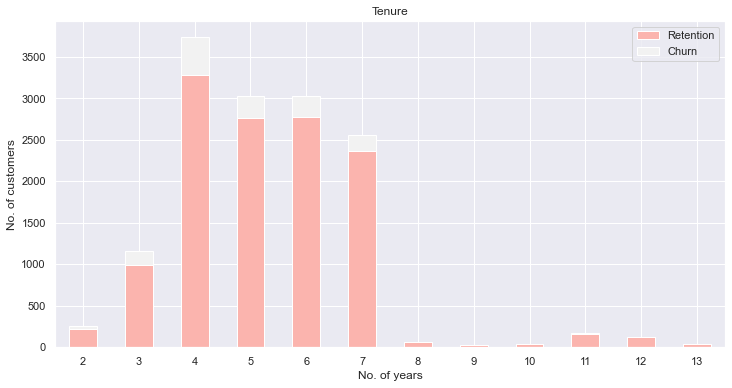

In [14]:
tenure.plot(kind='bar',stacked=True,rot=0,title='Tenure',figsize=(12,6),colormap='Pastel1')
plt.xlabel('No. of years')
plt.ylabel('No. of customers')
plt.legend(['Retention','Churn'])
plt.show()

- The churn is very low for companies which joined recently or that have made the contract a long time ago. With the higher number of churners within the 3-7 years of tenure

- Transform the dates provided in such a way that can make more sense out of those
    - "months_activ": Number of months active until reference date (Jan 2016)
    - "months_to_end: Number of months of the contract left at reference date (Jan 2016)
    - "months_modif_prod: Number of months since last modification at reference date (Jan 2016)
    - "months_renewal: Number of months since last renewal at reference date (Jan 2016)

In [15]:
import datetime

def convert_months(reference_date,df,col):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - pd.to_datetime(df[col])
    months = (time_delta / np.timedelta64(1,'M')).astype('int')
    
    return months

In [16]:
REFERENCE_DATE = datetime.datetime(2016,1,1)

train['months_activ'] = convert_months(REFERENCE_DATE,train,'date_activ')
train['months_to_end'] = -convert_months(REFERENCE_DATE,train,'date_end')
train['months_modif_prod'] = convert_months(REFERENCE_DATE,train,'date_modif_prod')
train['months_renewal'] = convert_months(REFERENCE_DATE,train,'date_renewal')

In [17]:
def plot_churn_by_month(df,col,fontsize=11,figsize=(20,10),rot=0):
    temp = df.groupby([col,'churn'])['id'].count().unstack(level=1)
    temp.plot(
        kind='bar',
        stacked=True,
        rot=rot,
        figsize=figsize,
        title=col,
        colormap='Pastel1'
    )
    plt.legend(['Retention','Churn'])
    plt.ylabel('No. of customers')
    plt.xlabel('No. of months')
    plt.xticks(fontsize=fontsize)
    plt.show()

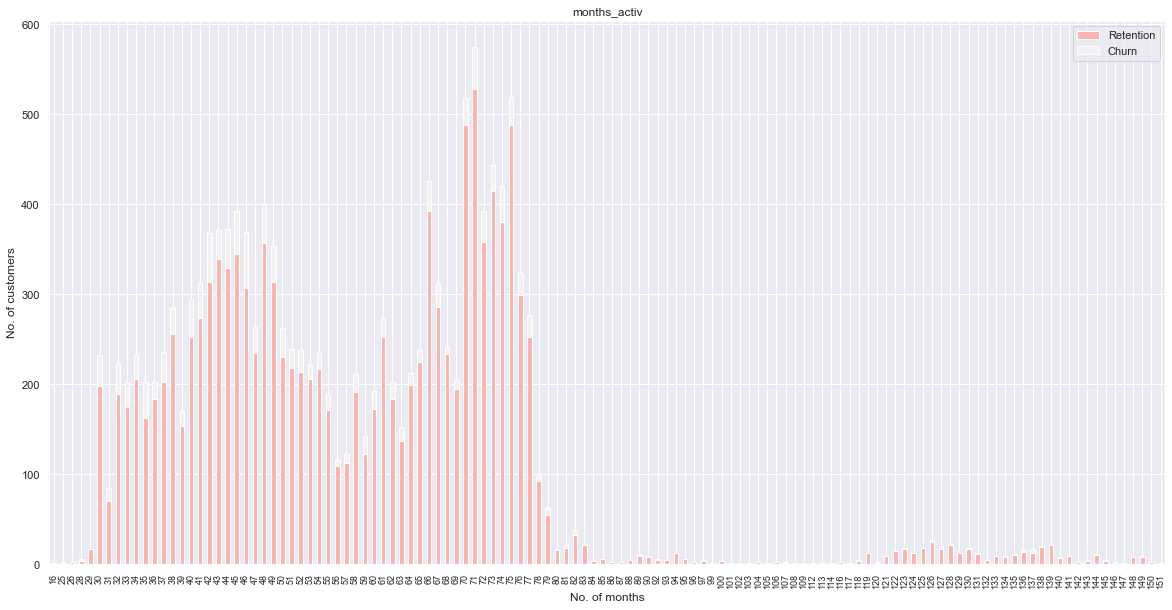

In [18]:
plot_churn_by_month(train,'months_activ',fontsize=9,rot=90)

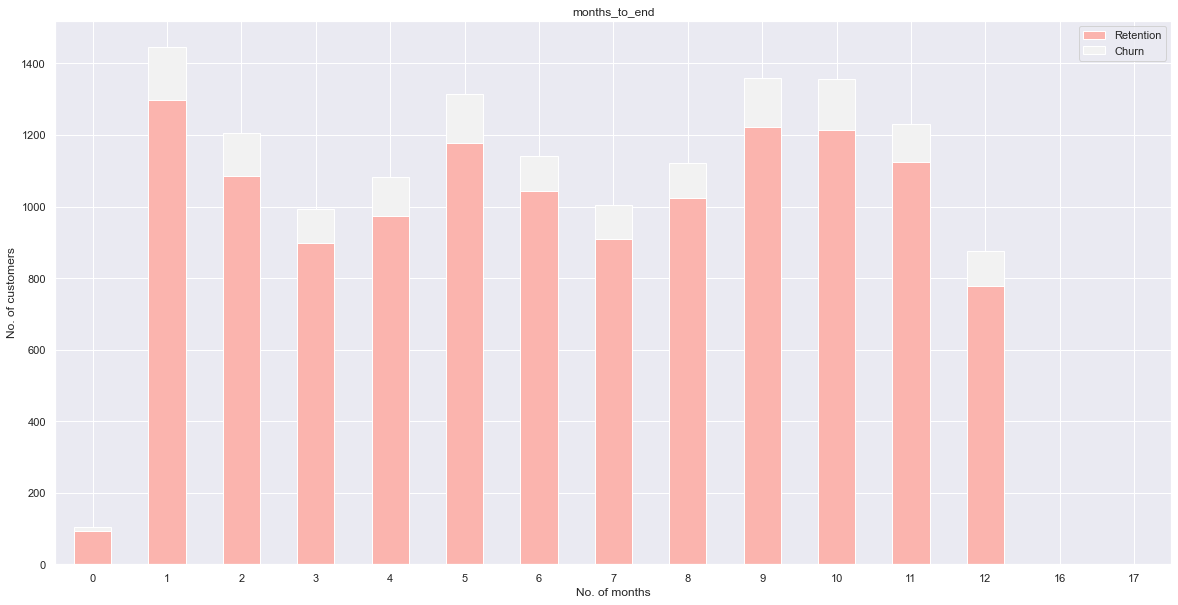

In [19]:
plot_churn_by_month(train,'months_to_end')

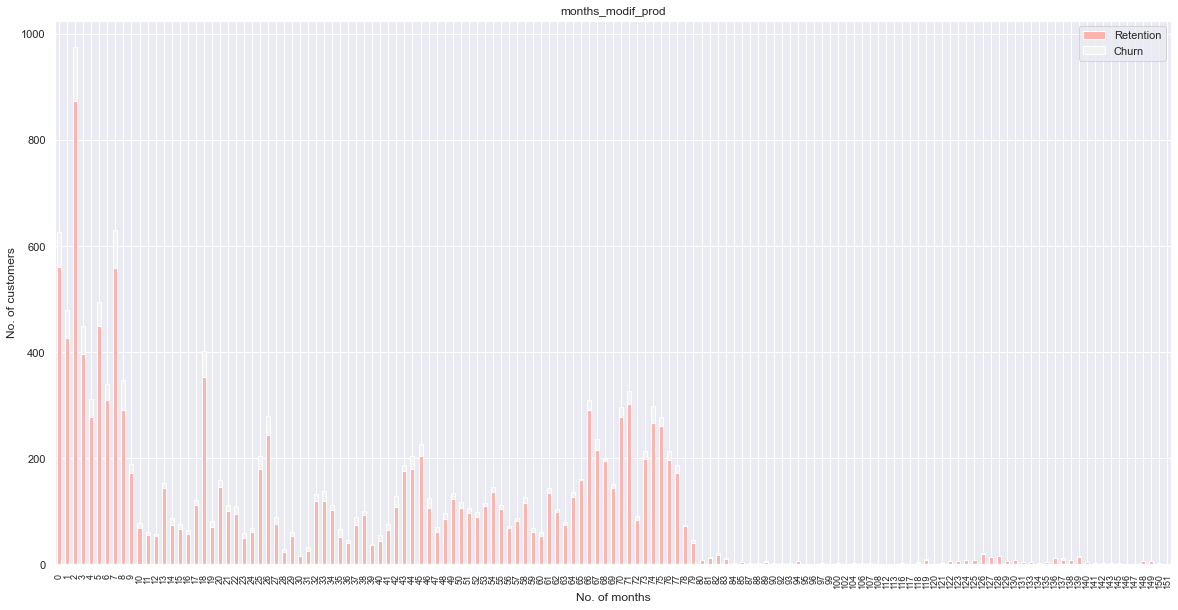

In [20]:
plot_churn_by_month(train,'months_modif_prod',rot=90,fontsize=9)

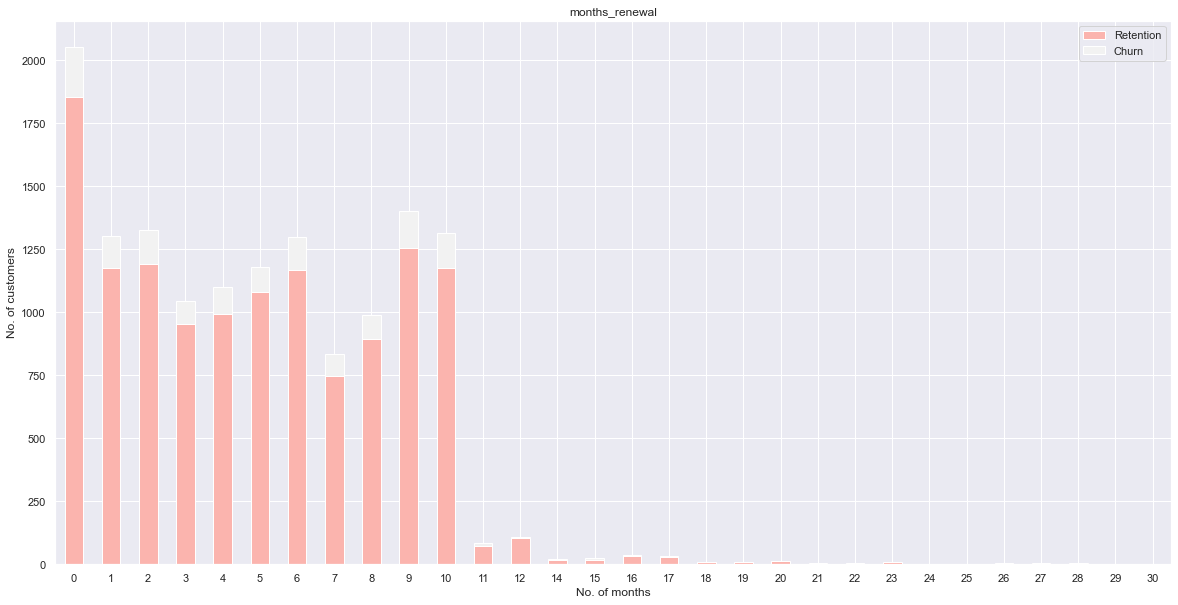

In [21]:
plot_churn_by_month(train,'months_renewal')

- Remove date columns

In [22]:
train.drop(['date_activ','date_end','date_modif_prod','date_renewal'],axis=1,inplace=True)

## Transforming boolean data

In [23]:
train['has_gas'] = train['has_gas'].replace({'t':1,'f':0})

## Categorical data and encoding

### channel_sales

In [24]:
#Fill the missing values
train['channel_sales'] = train['channel_sales'].fillna('unknown')
#Transform to categorical data type
train['channel_sales'] = train['channel_sales'].astype('category')

In [25]:
pd.DataFrame(train['channel_sales'].value_counts())

,channel_sales
foosdfpfkusacimwkcsosbicdxkicaua,6661
unknown,3520
lmkebamcaaclubfxadlmueccxoimlema,1804
usilxuppasemubllopkaafesmlibmsdf,1358
ewpakwlliwisiwduibdlfmalxowmwpci,880
sddiedcslfslkckwlfkdpoeeailfpeds,11
epumfxlbckeskwekxbiuasklxalciiuu,3
fixdbufsefwooaasfcxdxadsiekoceaa,2


In [26]:
#Create dummy variables
categories_channel = pd.get_dummies(train['channel_sales'],prefix='channel')
#Rename columns
categories_channel.columns = [i[:11] for i in categories_channel.columns]

In [27]:
#Remove unknown channel column
categories_channel.drop('channel_unk',axis=1,inplace=True)

In [28]:
categories_channel

,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi
0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
14234,0,0,0,1,0,0,0
14235,0,0,0,1,0,0,0
14236,0,0,0,1,0,0,0
14237,0,0,0,1,0,0,0


### origin_up

In [29]:
#Fill the missing values
train['origin_up'] = train['origin_up'].fillna('unknown')
#Transform to categorical data type
train['origin_up'] = train['origin_up'].astype('category')

In [30]:
pd.DataFrame(train['origin_up'].value_counts())

,origin_up
lxidpiddsbxsbosboudacockeimpuepw,6962
kamkkxfxxuwbdslkwifmmcsiusiuosws,4253
ldkssxwpmemidmecebumciepifcamkci,3021
usapbepcfoloekilkwsdiboslwaxobdp,2
ewxeelcelemmiwuafmddpobolfuxioce,1


In [31]:
#Create dummy variables
categories_origin = pd.get_dummies(train['origin_up'],prefix='origin')
#Rename columns
categories_origin.columns = [i[:10] for i in categories_origin.columns]

In [32]:
#Remove origin_ewx column
categories_origin.drop('origin_ewx',axis=1,inplace=True)

In [33]:
categories_origin

,origin_kam,origin_ldk,origin_lxi,origin_usa
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
14234,0,0,1,0
14235,0,0,1,0
14236,0,0,1,0
14237,0,0,1,0


### activity_new

In [34]:
#Fill the missing values
train['activity_new'] = train['activity_new'].fillna('unknown')
#Transform to categorical data type
train['activity_new'] = train['activity_new'].astype('category')

In [35]:
pd.DataFrame(train['activity_new'].value_counts().sort_values(ascending=False))

,activity_new
unknown,8712
apdekpcbwosbxepsfxclislboipuxpop,1304
kkklcdamwfafdcfwofuscwfwadblfmce,402
fmwdwsxillemwbbwelxsampiuwwpcdcb,198
kwuslieomapmswolewpobpplkaooaaew,179
...,...
xumuokeiidieboawuxkidxufcexecbbl,1
xwkiacfesppesmilbxkmbmwdopsmslwp,1
opemwsspmskladcbclpkmilallxmiook,1
fxbibmudumblomsslpiomaxfbiiocbua,1


In [36]:
top_activity_new = list(train['activity_new'].value_counts().sort_values(ascending=False).head(11).index)
#Create dummy variables
categories_activity = pd.DataFrame()
for categories in top_activity_new:
    categories_activity[categories]=np.where(train['activity_new']==categories,1,0)
#Rename columns
categories_activity.columns = [('activity_'+i[:3]) for i in categories_activity.columns]


In [37]:
#Remove activity_unknown column
categories_activity.drop('activity_unk',axis=1,inplace=True)

In [38]:
categories_activity

,activity_apd,activity_kkk,activity_fmw,activity_kwu,activity_ckf,activity_cwo,activity_clu,activity_wxe,activity_sfi,activity_sff
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14234,0,0,0,0,0,0,0,0,0,0
14235,0,0,0,0,0,0,0,0,0,0
14236,0,0,0,0,0,0,0,0,0,0
14237,0,0,0,0,0,0,0,0,0,0


## Categorical data -Feature engineering

In [39]:
#Merge dummy variables to main dataframe
train = pd.merge(train,categories_channel,left_index=True,right_index=True)
train = pd.merge(train,categories_origin,left_index=True,right_index=True)
train = pd.merge(train,categories_activity,left_index=True,right_index=True)
#Remove old categorical columns
train.drop(['channel_sales','origin_up','activity_new'],axis=1,inplace=True)

## Data Transformation

- There are several methods in which we can reduce skewness such as square-root, cube-root, and log. In this case we will use a log transformation which usally recommended for right skewed data.

In [40]:
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,tenure,months_activ,months_to_end,months_modif_prod,months_renewal,channel_epu,channel_ewp,channel_fix,channel_foo,channel_lmk,channel_sdd,channel_usi,origin_kam,origin_ldk,origin_lxi,origin_usa,activity_apd,activity_kkk,activity_fmw,activity_kwu,activity_ckf,activity_cwo,activity_clu,activity_wxe,activity_sfi,activity_sff
count,1.423900e+04,1.423900e+04,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.00000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000,14239.000000
mean,1.607905e+05,2.821120e+04,16257.063207,1904.484522,1415.277548,0.983777,62.710428,0.138343,0.050610,43.332721,0.181895,155.575231,24.437485,24.434814,1.293209,191.356775,4.961936,17.902022,0.098111,5.286045,58.150994,6.354519,34.843739,4.951471,0.000211,0.061802,0.000140,0.46780,0.126694,0.000773,0.095372,0.298687,0.212164,0.488939,0.000140,0.091579,0.028232,0.013905,0.012571,0.011799,0.007936,0.007093,0.007093,0.005478,0.004986
std,5.783071e+05,1.634728e+05,64911.404350,2366.612804,3245.816272,5.151158,64.692802,0.021999,0.049072,2.731647,0.385771,342.051993,19.806391,19.805439,0.712246,313.033185,1.581325,12.657191,0.297475,1.673940,19.036943,3.496576,29.803264,3.787752,0.014514,0.240804,0.011851,0.49898,0.332642,0.027785,0.293738,0.457698,0.408855,0.499895,0.011851,0.288442,0.165642,0.117103,0.111418,0.107982,0.088733,0.083925,0.083925,0.073813,0.070440
min,0.000000e+00,0.000000e+00,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,2.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.730500e+03,0.000000e+00,0.000000,525.025000,0.000000,0.000000,16.200000,0.116509,0.000000,40.606701,0.000000,0.000000,14.370000,14.350000,1.000000,52.305000,4.000000,12.500000,0.000000,4.000000,44.000000,3.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.417400e+04,0.000000e+00,805.000000,1149.190000,340.000000,0.000000,18.860000,0.143170,0.084138,44.311378,0.000000,42.040000,21.640000,21.630000,1.000000,114.130000,5.000000,13.856000,0.000000,5.000000,57.000000,6.000000,28.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.108050e+04,0.000000e+00,3400.000000,2443.120000,1775.000000,0.000000,131.020000,0.146348,0.098837,44.311378,0.000000,198.155000,29.760000,29.760000,1.000000,245.655000,6.000000,19.000000,0.000000,6.000000,71.000000,9.000000,63.000000,8.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,1.000000,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.00

### Raw data distributions

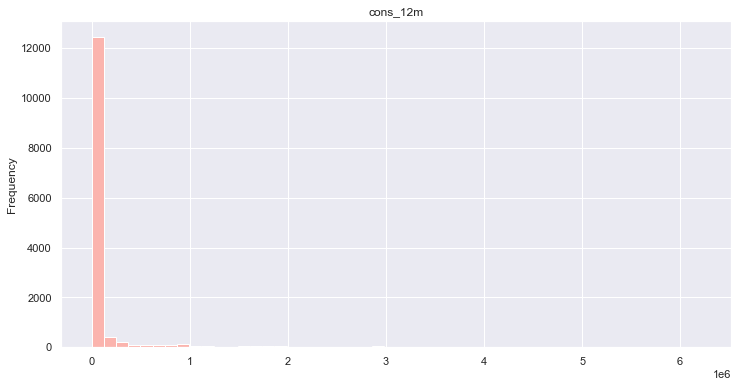

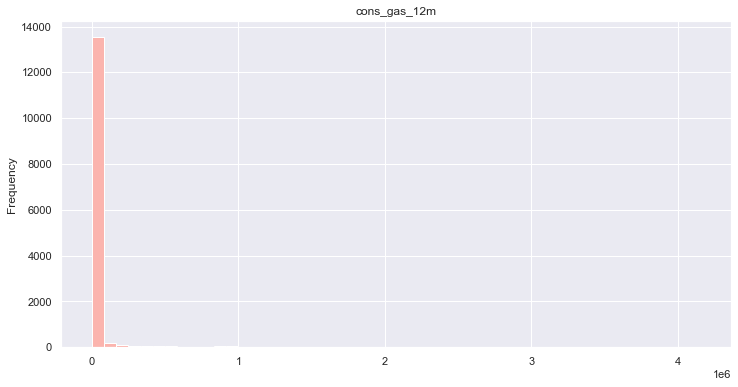

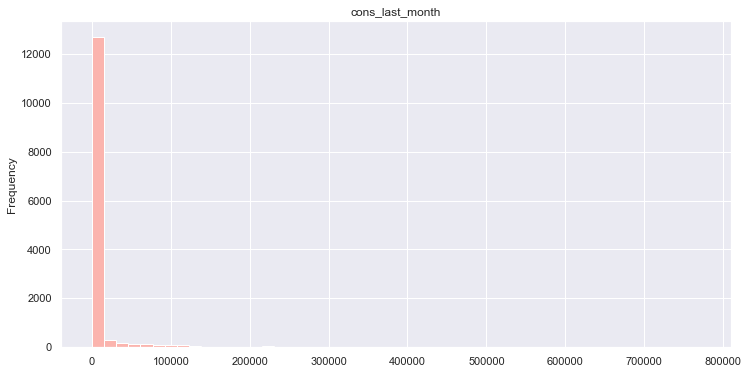

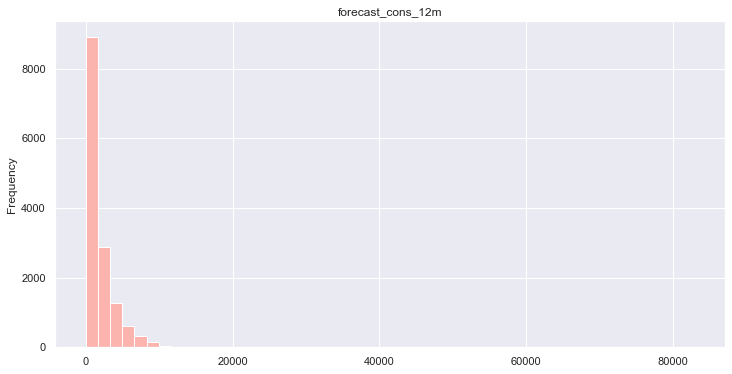

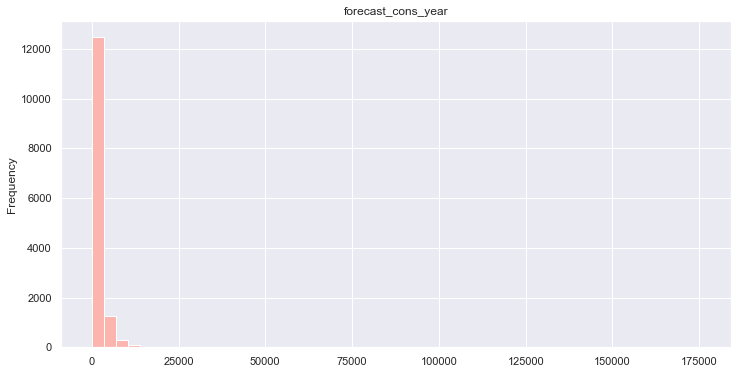

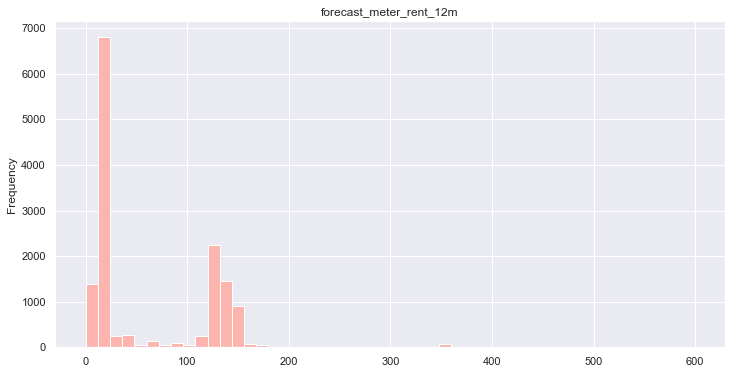

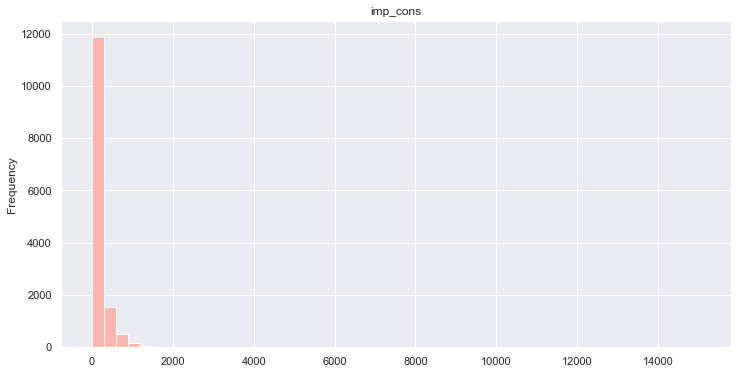

In [41]:
for col in ['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons']:
    train[col].plot(kind='hist',figsize=(12,6),colormap='Pastel1',title=col,bins=50)
    plt.show()

- Log transformation does not work with negative data, so we will convert the negative values to NaN
- Also we cannot apply a log transformation to 0 valued entries, so we will add a constant 1

In [42]:
#Remove negative values
train.loc[train['cons_12m'] < 0,'cons_12m'] = np.nan
train.loc[train['cons_gas_12m'] < 0,'cons_gas_12m'] = np.nan
train.loc[train['cons_last_month'] < 0,'cons_last_month'] = np.nan
train.loc[train['forecast_cons_12m'] < 0,'forecast_cons_12m'] = np.nan
train.loc[train['forecast_cons_year'] < 0,'forecast_cons_year'] = np.nan
train.loc[train['forecast_meter_rent_12m'] < 0,'forecast_meter_rent_12m'] = np.nan
train.loc[train['imp_cons'] < 0,'imp_cons'] = np.nan

In [43]:
#Apply log10 transformation
train['cons_12m'] = np.log10(train['cons_12m']+1)
train['cons_gas_12m'] = np.log10(train['cons_gas_12m']+1)
train['cons_last_month'] = np.log10(train['cons_last_month']+1)
train['forecast_cons_12m'] = np.log10(train['forecast_cons_12m']+1)
train['forecast_cons_year'] = np.log10(train['forecast_cons_year']+1)
train['forecast_meter_rent_12m'] = np.log10(train['forecast_meter_rent_12m']+1)
train['imp_cons'] = np.log10(train['imp_cons']+1)

### New data distributions

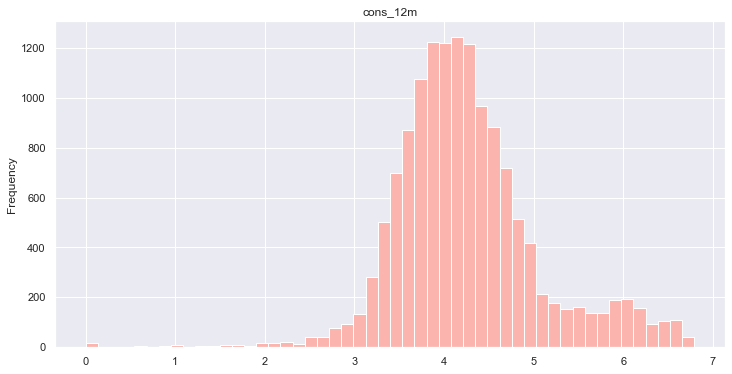

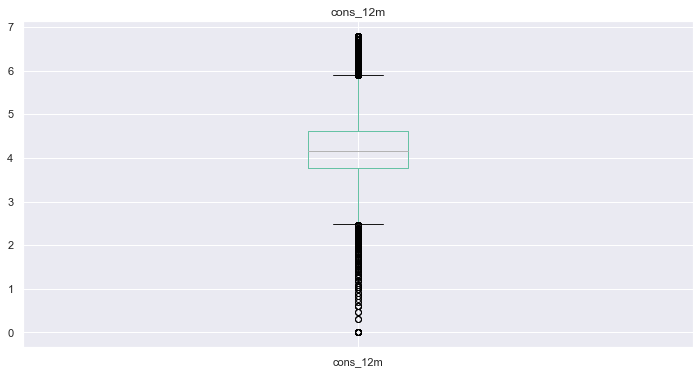

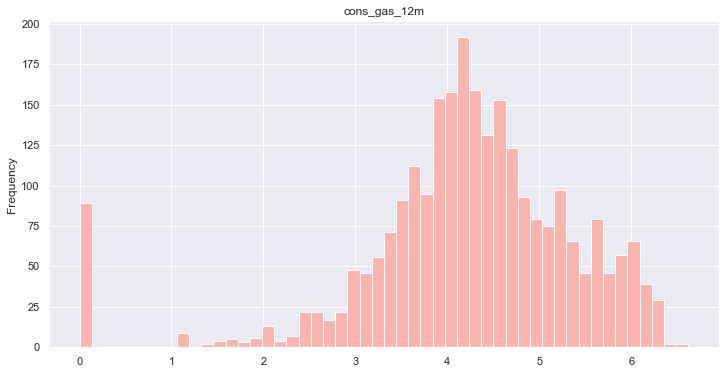

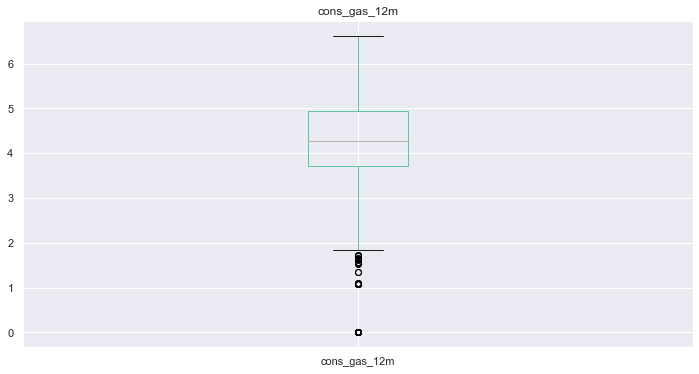

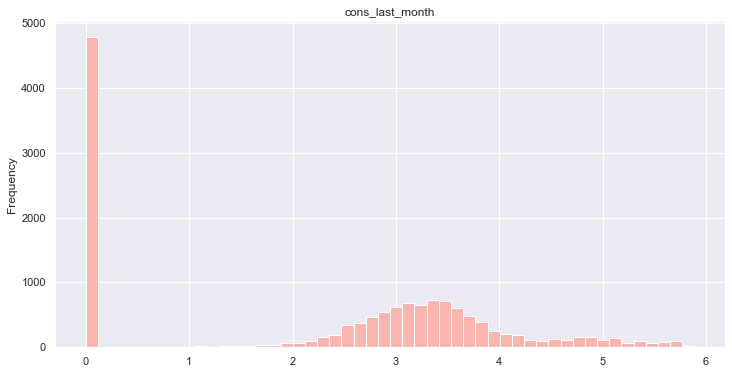

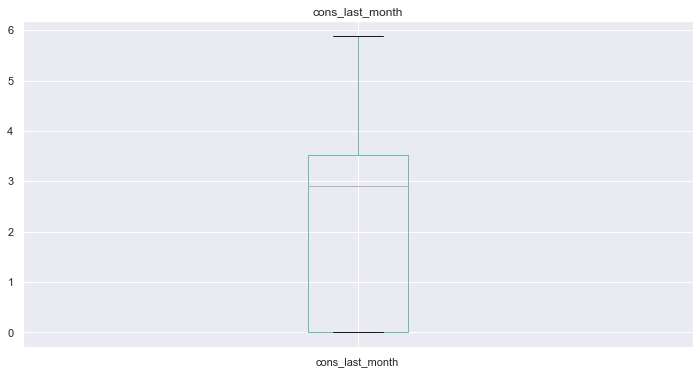

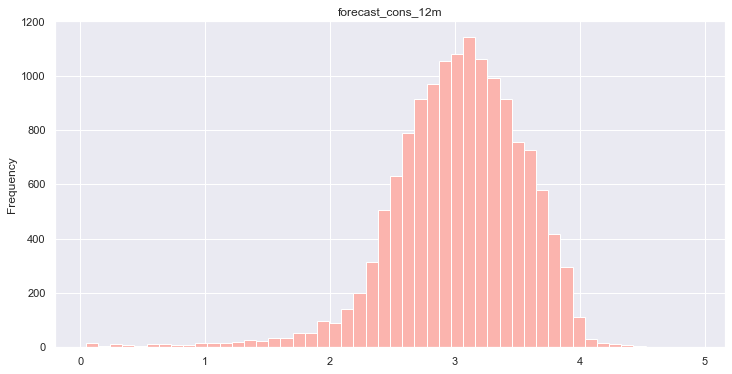

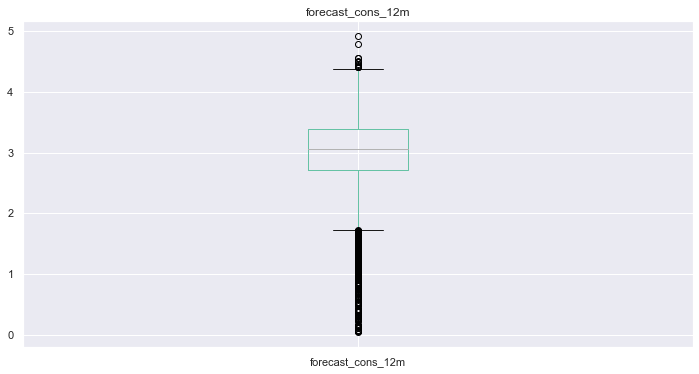

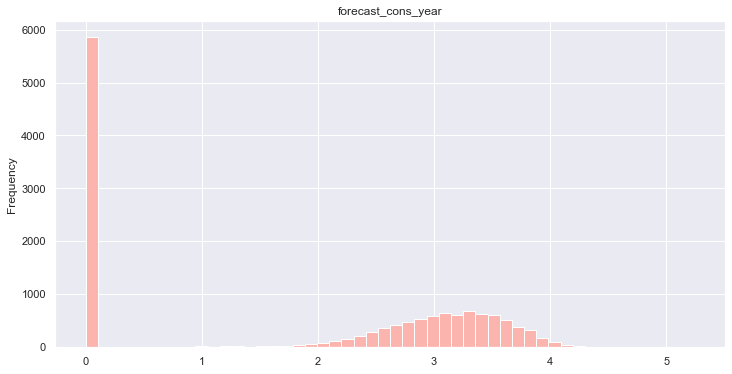

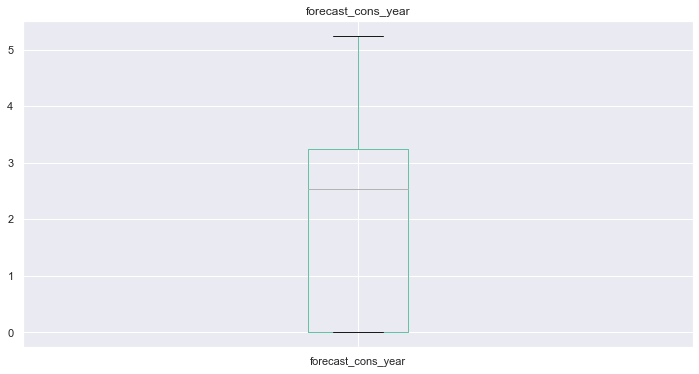

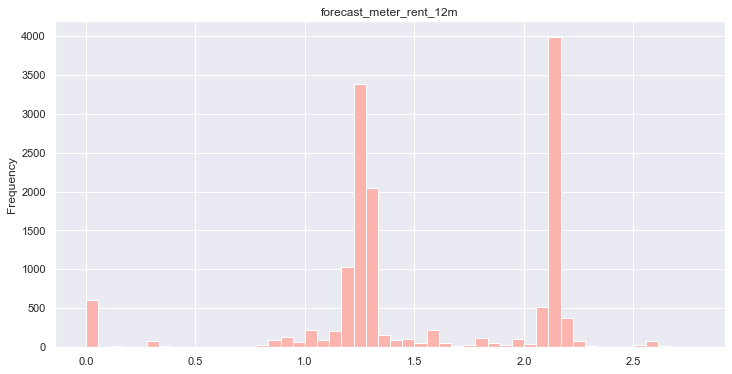

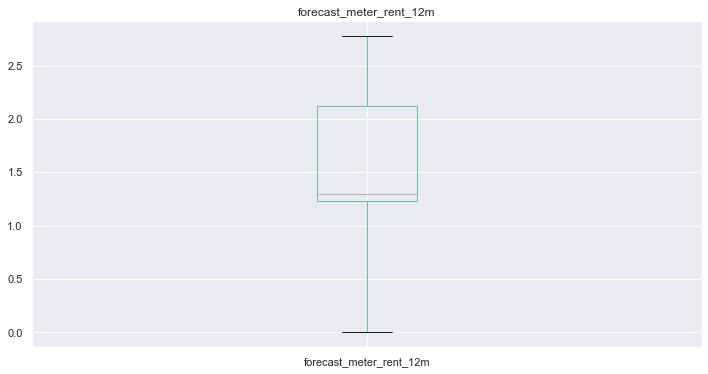

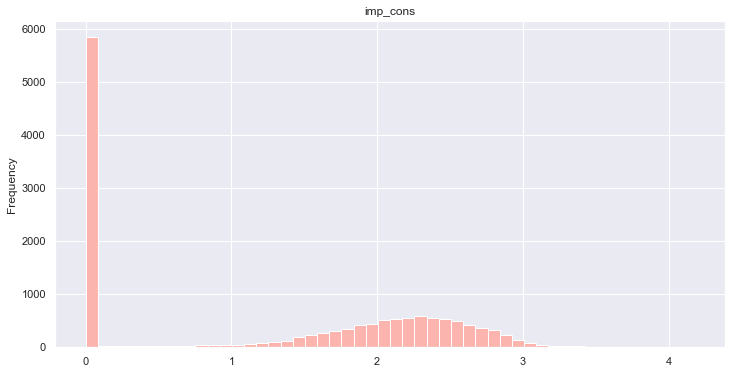

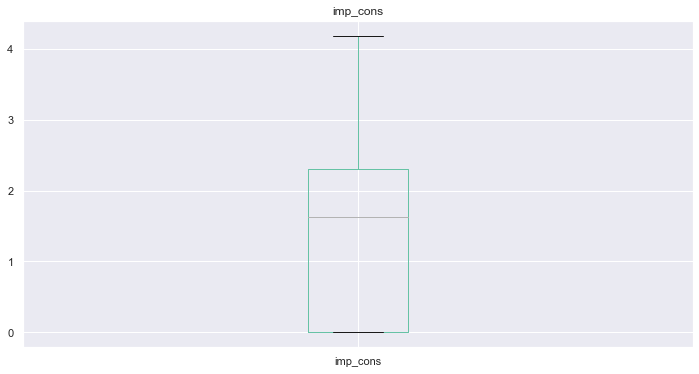

In [44]:
for col in ['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_meter_rent_12m','imp_cons']:
    if col == 'cons_gas_12m':
        train[train['has_gas']==1][col].plot(kind='hist',figsize=(12,6),colormap='Pastel1',title=col,bins=50)
        plt.show()
        train[train['has_gas']==1][col].plot(kind='box',figsize=(12,6),colormap='Set2',title=col)
        plt.show()
    else:
        train[col].plot(kind='hist',figsize=(12,6),colormap='Pastel1',title=col,bins=50)
        plt.show()
        train[col].plot(kind='box',figsize=(12,6),colormap='Set2',title=col)
        plt.show()

- The distributions look much closer to normal distribution now
- From the boxplots we can still see some values are outliers

# 3. High correlation variables

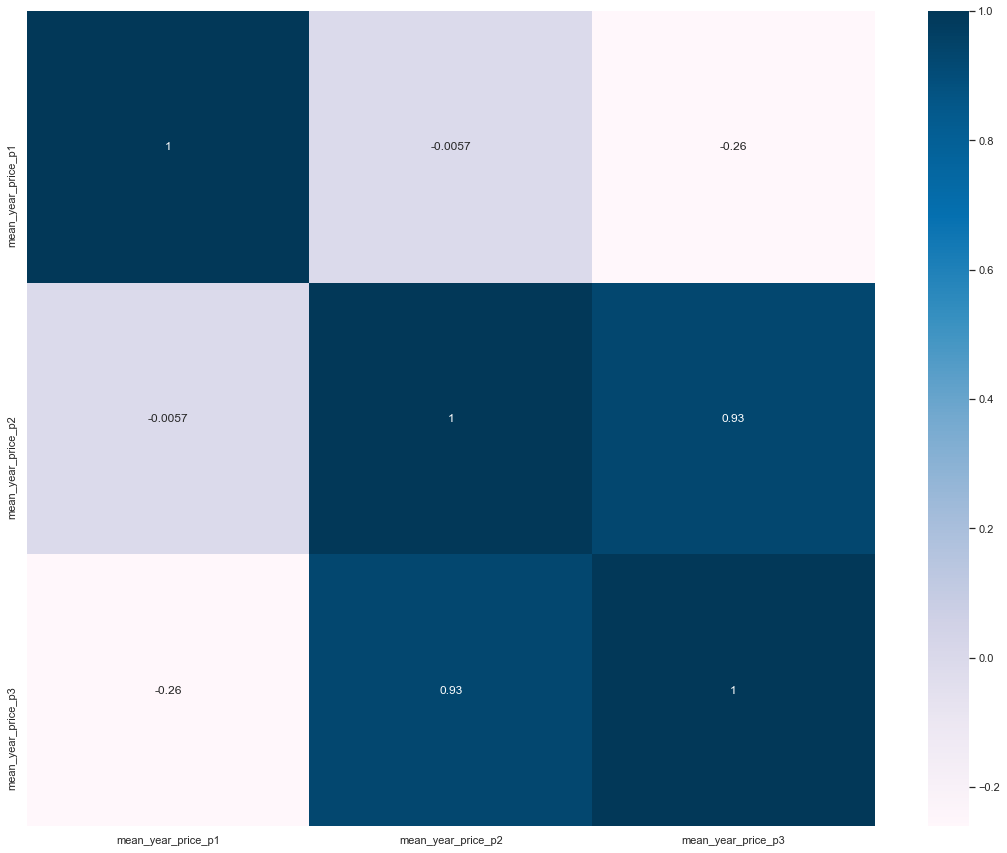

In [45]:
price_correlation = features.corr()
#Plot
plt.figure(figsize=(19,15))
sns.heatmap(price_correlation,cmap='PuBu',annot=True)
plt.show()

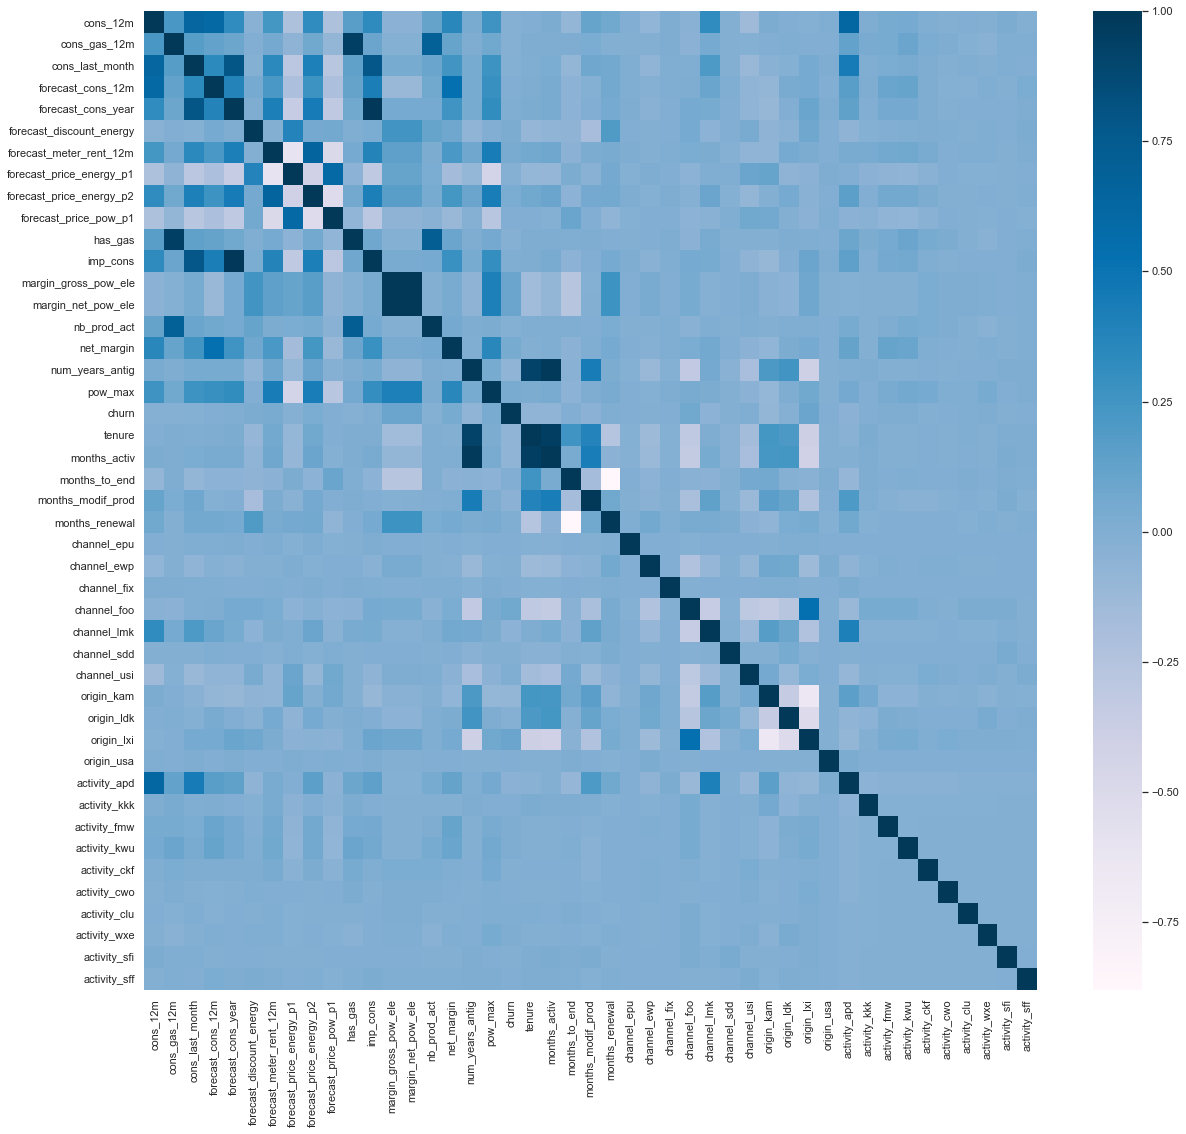

In [46]:
train_correlation = train.corr()
#Plot
plt.figure(figsize=(20,18))
sns.heatmap(train_correlation,cmap='PuBu')
plt.show()

In [47]:
#We can remove variables with very high correlation
train.drop(['num_years_antig','forecast_cons_year','months_activ','margin_gross_pow_ele'],axis=1,inplace=True)

# 4. Removing outliers

In [48]:
def find_outliers_iqr(dataframe, column):
    """
    Find outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column 

    Returns
    -------
    Dict
    With the values of the iqr, lower_bound and upper_bound
    """
    col = sorted(dataframe[column])
    q1, q3= np.percentile(col,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    results = {"iqr": iqr, "lower_bound":lower_bound, "upper_bound":upper_bound}
    return results
def remove_outliers_iqr(dataframe, column):
    """
    Remove outliers using the 1.5*IQR rule.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column 

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """

    outliers = find_outliers_iqr(dataframe, column)
    removed = dataframe[(dataframe[column] < outliers["lower_bound"]) |
    (dataframe[column] > outliers["upper_bound"])].shape

    dataframe = dataframe[(dataframe[column] > outliers["lower_bound"]) &
    (dataframe[column] < outliers["upper_bound"])]
    print("Removed:", removed[0], " outliers")
    return dataframe
def remove_outliers_z_score(dataframe, column, Z=3):
    """
    Remove outliers using the Z score. Values with more than 3 are removed.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column 

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    dataframe["zscore"] = zscore(dataframe[column])

    removed = dataframe[(dataframe["zscore"] < -Z) |
    (dataframe["zscore"] > Z)].shape

    dataframe = dataframe[(dataframe["zscore"] > -Z) &
    (dataframe["zscore"] < Z)]

    print("Removed:", removed[0], " outliers of ", column)

    return dataframe.drop(columns="zscore")
    Returns
def replace_outliers_z_score(dataframe, column, Z=3):
    """
    Replace outliers with the mean values using the Z score.
    Nan values are also replaced with the mean values.
    Parameters
    ----------
    dataframe : pandas dataframe
    Contains the data where the outliers are to be found
    column : str
    Usually a string with the name of the column 

    Returns
    -------
    Dataframe
    With outliers under the lower and above the upper bound removed
    """
    from scipy.stats import zscore

    df = dataframe.copy(deep=True)
    df.dropna(inplace=True, subset=[column])

    # Calculate mean without outliers
    df["zscore"] = zscore(df[column])
    mean_ = df[(df["zscore"] > -Z) & (df["zscore"] < Z)][column].mean()

    # Replace with mean values
    dataframe[column] = dataframe[column].fillna(mean_)
    dataframe["zscore"] = zscore(dataframe[column])
    no_outliers = dataframe[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z)].shape[0]
    dataframe.loc[(dataframe["zscore"] < -Z) | (dataframe["zscore"] > Z),column] = mean_

    # Print message
    print("Replaced:", no_outliers, " outliers in ", column)
    return dataframe.drop(columns="zscore")

In [49]:
for c in features.columns:
    if c != "id":
        features = replace_outliers_z_score(features,c)

Replaced: 122  outliers in  mean_year_price_p1
Replaced: 0  outliers in  mean_year_price_p2
Replaced: 0  outliers in  mean_year_price_p3


In [50]:
for col in train.iloc[:,1:21].drop(['tenure','churn'],axis=1).columns:
    train = replace_outliers_z_score(train,col)

Replaced: 110  outliers in  cons_12m
Replaced: 150  outliers in  cons_gas_12m
Replaced: 0  outliers in  cons_last_month
Replaced: 187  outliers in  forecast_cons_12m
Replaced: 506  outliers in  forecast_discount_energy
Replaced: 0  outliers in  forecast_meter_rent_12m
Replaced: 149  outliers in  forecast_price_energy_p1
Replaced: 0  outliers in  forecast_price_energy_p2
Replaced: 188  outliers in  forecast_price_pow_p1
Replaced: 0  outliers in  has_gas
Replaced: 0  outliers in  imp_cons
Replaced: 225  outliers in  margin_net_pow_ele
Replaced: 201  outliers in  nb_prod_act
Replaced: 71  outliers in  net_margin
Replaced: 276  outliers in  pow_max
Replaced: 2  outliers in  months_to_end
Replaced: 168  outliers in  months_modif_prod
Replaced: 111  outliers in  months_renewal


In [51]:
train.reset_index(drop=True,inplace=True)

In [53]:
train.to_csv('train_fe.csv',index=False)
features.to_csv('history_price_fe.csv',index=False)